In [216]:
import setup

In [217]:
import numpy as np
import torch

from data.pixta_face_dataset import PIXTAFaceDataset

In [218]:
dataset = PIXTAFaceDataset('../datasets/pixta_face/', 'train')

In [219]:
dataset[0]

{'image': tensor([[[ 20,  19,  20,  ..., 191, 161, 179],
          [ 19,  19,  19,  ..., 191, 161, 177],
          [ 19,  19,  19,  ..., 187, 161, 177],
          ...,
          [ 16,  16,  16,  ..., 229, 229, 234],
          [ 16,  16,  16,  ..., 227, 229, 238],
          [ 16,  16,  16,  ..., 226, 227, 235]],
 
         [[ 20,  19,  20,  ..., 195, 167, 177],
          [ 19,  19,  19,  ..., 194, 167, 177],
          [ 19,  19,  19,  ..., 193, 167, 177],
          ...,
          [ 16,  16,  16,  ..., 216, 222, 229],
          [ 16,  16,  16,  ..., 214, 224, 237],
          [ 16,  16,  16,  ..., 213, 222, 233]],
 
         [[ 20,  19,  20,  ..., 207, 183, 190],
          [ 19,  19,  19,  ..., 209, 183, 189],
          [ 19,  19,  19,  ..., 207, 183, 189],
          ...,
          [ 16,  16,  16,  ..., 210, 216, 225],
          [ 16,  16,  16,  ..., 206, 218, 235],
          [ 16,  16,  16,  ..., 205, 216, 234]]], dtype=torch.uint8),
 'age': tensor([3], dtype=torch.int32),
 'gender': ten

In [220]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import ImageDraw
from PIL import ImageFont
from torchvision.transforms.functional import to_pil_image

def get_sample_image(sample):
    # convert torch tensor to PIL image
    image = to_pil_image(sample['image'])

    draw = ImageDraw.Draw(image)

    for i, box in enumerate(sample['boxes']):
        x, y, w, h = int(box[0]), int(box[1]), int(box[2]), int(box[3])

        color = 'red' if sample['gender'][i] == 0 else 'blue'

        draw.rectangle(((x, y), (x+w, y+h)), outline=color, width=2)

        age = dataset.categories['age'][int(sample['age'][i])]
        race = dataset.categories['race'][int(sample['race'][i])]
        emotion = dataset.categories['emotion'][int(sample['emotion'][i])]
        masked = dataset.categories['masked'][int(sample['masked'][i])]

        font = ImageFont.load_default(w/5)
        
        # Display text
        text = f"{age}\n{race}\n{emotion}\n{masked}"
        draw.text((x, y), text, fill="black", font=font)

    return image

In [221]:
import torchvision.transforms.v2 as T

In [ ]:
from utils.transform import SquarePad, RandomCropWithoutLossingBoxes

IMAGE_SIZE = 640

transform = T.Compose([
    RandomCropWithoutLossingBoxes(),
    SquarePad(),
    T.RandomRotation(degrees=[-30, 30]),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomGrayscale(p=0.1),
    T.Resize(IMAGE_SIZE, antialias=True),
    T.ColorJitter(brightness=[0.5, 1.25]),
    T.RandomApply([
        T.GaussianBlur(kernel_size=(7, 7), sigma=(0.1, 2))
    ], p=0.5),
])

In [223]:
def visualize_sample(sample):
    # draw in 1x2 grid
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    ax1.imshow(get_sample_image(sample))
    ax1.set_title('Original')
    ax1.axis('off')

    transformed_sample = transform(sample)

    ax2.imshow(get_sample_image(transformed_sample))
    ax2.set_title('Transformed')
    ax2.axis('off')

    plt.show()

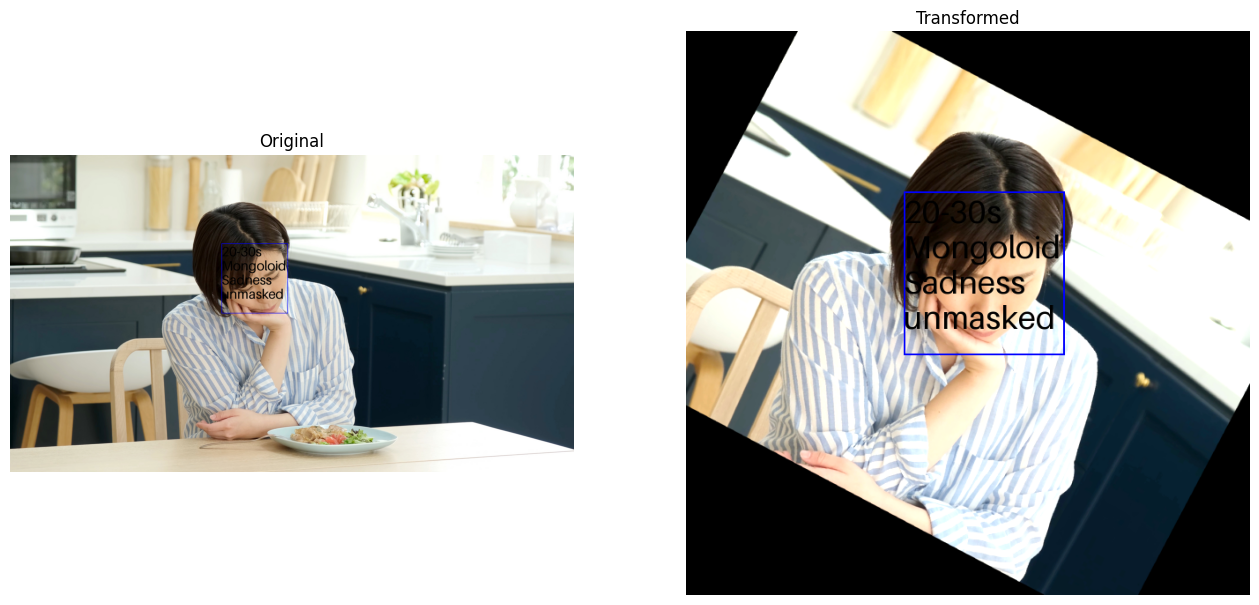

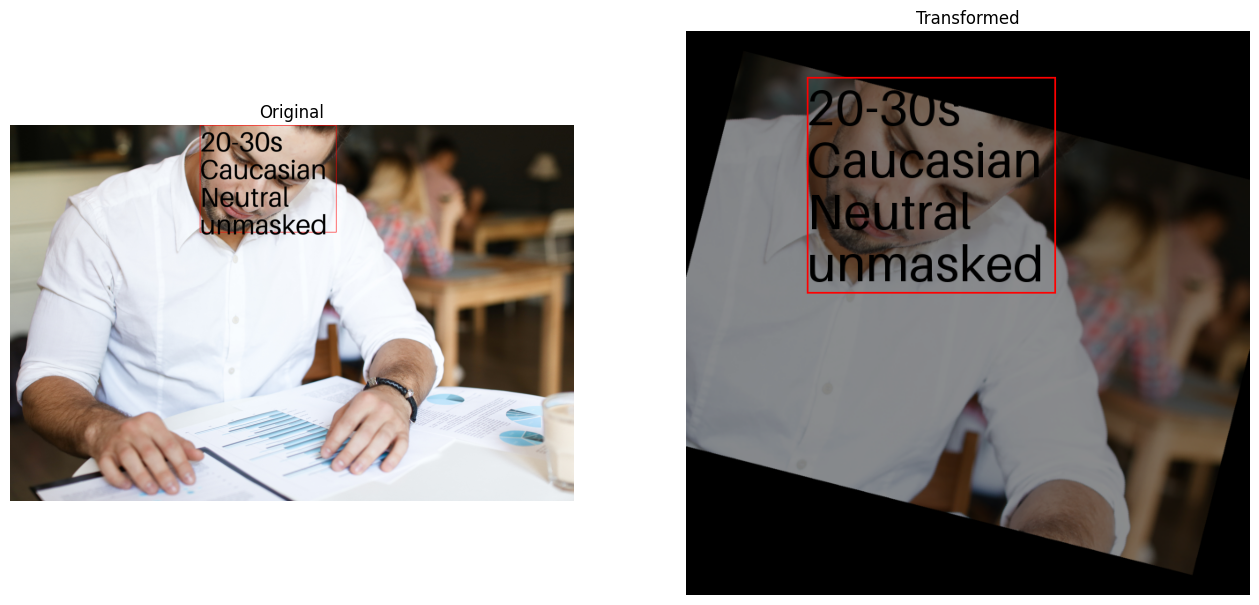

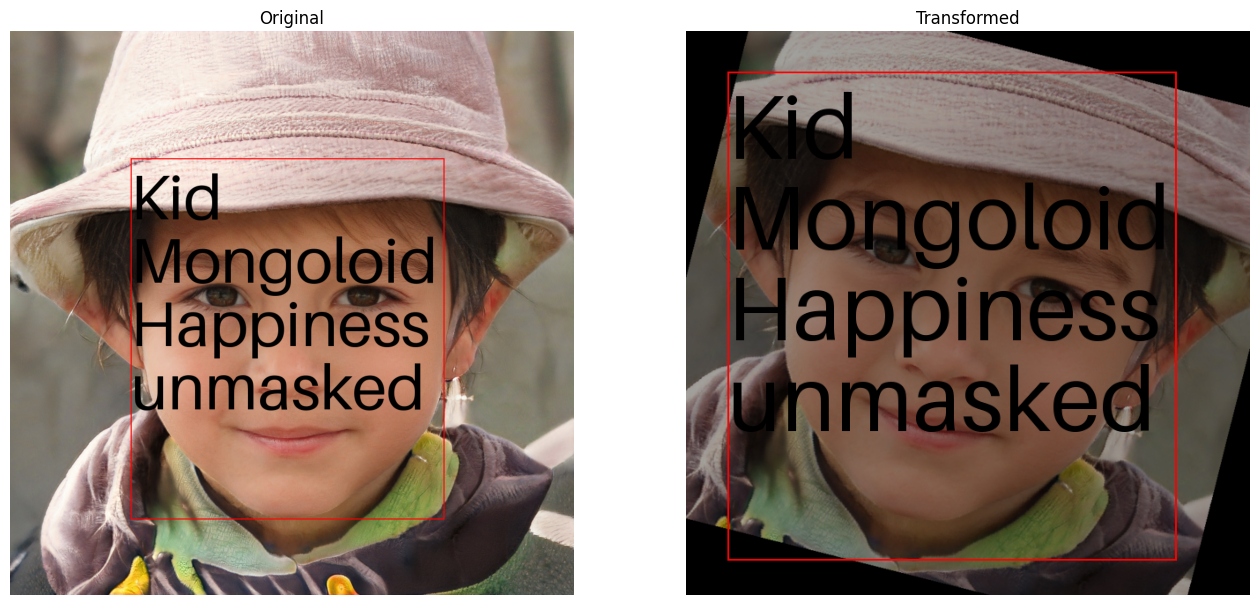

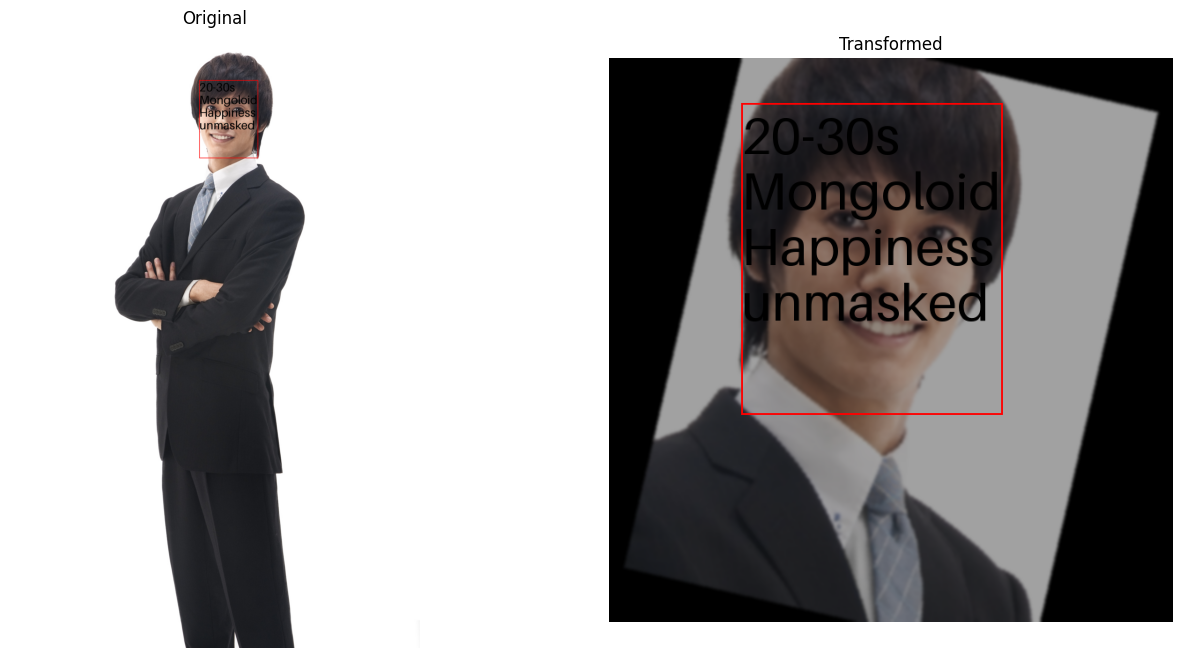

In [236]:
# visualize 4 random samples
for i in range(4):
    sample = dataset[np.random.randint(0, len(dataset))]
    visualize_sample(sample)